# Bài tập 1

In [28]:
import numpy as np
from scipy import linalg
A = np.array([[2, 1, -1, -1], [2, 5, -7, -5], [2, -1, 1, 3], [5, 2, -4, 2]])
b = np.array([1, -2, 4, 6])
A_inv = np.linalg.inv(A)
X_option1 = np.dot(A_inv, b)



lu, piv = linalg.lu_factor(A)
X_option2 = linalg.lu_solve((lu,piv), b)


np.allclose(X_option2, X_option1)

True

# Bài tập 2

In [29]:
def f0():
    return 1
def f1a(x):
    return x
def f2a(x):
    return x*x
def f3a(x):
    return x*x*x


def f1b(x):
    return x - 1
def f2b(x):
    return (x - 1)*(x-2)
def f3b(x):
    return (x - 1)*(x - 2)*(x - 3)

Ca = np.array([[f0(), f1a(1), f2a(1), f3a(1)], [f0(), f1a(2), f2a(2), f3a(2)], [f0(), f1a(3), f2a(3), f3a(3)], [f0(), f1a(4), f2a(4), f3a(4)]])
Cb = np.array([[f0(), f1b(1), f2b(1), f3b(1)], [f0(), f1b(2), f2b(2), f3b(2)], [f0(), f1b(3), f2b(3), f3b(3)], [f0(), f1b(4), f2b(4), f3b(4)]])
y = np.array([1, 3, 5, 4])
x = np.array([1, 2, 3, 4])

c0a, c1a, c2a, c3a = np.linalg.lstsq(Ca, y, rcond=None)[0]
c0b, c1b, c2b, c3b = np.linalg.lstsq(Cb, y,  rcond=None)[0]

print("Cau a: Cac he so can tim la: ", c0a, c1a, c2a, c3a)
print("Cau b: Cac he so can tim la: ", c0b, c1b, c2b, c3b)

Cau a: Cac he so can tim la:  1.9999999999999856 -3.500000000000002 2.9999999999999987 -0.5000000000000047
Cau b: Cac he so can tim la:  1.0000000000000009 1.9999999999999971 2.4518122660839934e-15 -0.5000000000000002


# Bài tập 3

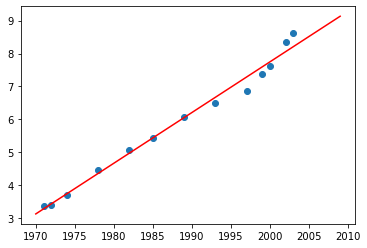

Log10_N = 3.125593+0.154018(year-1970)


In [21]:
year = np.array([1971, 1972, 1974, 1978, 1982, 1985, 1989, 1993, 1997, 1999, 2000, 2002, 2003])
trans = np.array([2250, 2500, 5000, 29000, 120000, 275000, 1180000, 3100000, 7500000, 24000000, 42000000, 220000000, 410000000])

A = np.vstack([np.ones(len(year)), year - 1970]).T
b0, b1 = np.linalg.lstsq(A, np.log10(trans), rcond=None)[0]

xfit = np.linspace(1970, 2009) 
#Xfit = xfit[:,np.newaxis]
yfit = b1*(xfit - 1970)+b0
plt.scatter(year, np.log10(trans), label = 'original data')
plt.plot(xfit, yfit,'r', label = 'fitted data')

plt.show()
print("Log10_N = %f+%f(year-1970)"%(b0,b1))

# Bài tập 4

Mo hinh: y = 25792.200199+9449.962321 x


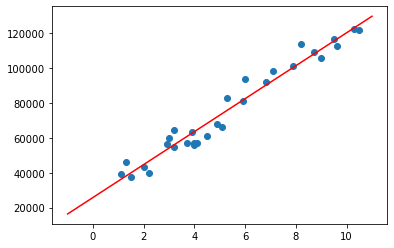

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
data = pd.read_csv("salary_data.csv")
x = data["YearsExperience"].values
y = data["Salary"].values
model = LinearRegression(fit_intercept=True)
X = x[:,np.newaxis]
model.fit(X, y)
print("Mo hinh: y = %f+%f x"%(model.intercept_, model.coef_[0]))
xfit = np.linspace(-1, 11)
Xfit = xfit[:,np.newaxis]
yfit = model.predict(Xfit)
plt.scatter(x, y, label = 'original data')
plt.plot(xfit, yfit,'r', label = 'fitted data')

plt.show()